<a href="https://colab.research.google.com/github/lima-breno/data_vizualization/blob/main/DV_03_1_Desafio_aprofundado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio Aula 01

Vamos praticar a criação de gráficos de comparação (colunas e barras) que aprendemos até aqui. Para a prática, vamos seguir utilizando o conjunto de dados do relatório de vendas das lojas de departamentos de 2016 a 2019 que está disponível no github do projeto.
Neste desafio, a missão é construir as visualizações que respondam aos questionamentos que compartilharemos aqui abaixo:

Desafio 1: Quais são os lucros das vendas por ano? Em qual ano obtivemos o maior lucro?

Desafio 2: Qual foi o faturamento (vendas) dos top 10 produtos durante o período de 2016 a 2019 do nosso conjunto de dados? Adicione um pequeno texto falando dos 3 produtos que mais venderam.

## Desafio 01
### Quais são os lucros das vendas por ano? Em qual ano obtivemos o maior lucro?

In [ ]:
# Desafio 1

import pandas as pd
vendas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Curso 02 - Avançado em Python/1.2 Data Visualization: Gráficos de comparação e distribuição/Dados utilizados/relatorio_vendas.csv')

vendas.head()

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28


In [ ]:
# Ajustando os dados do tempo de pedido
vendas['data_pedido'] = pd.to_datetime(vendas['data_pedido'], format ='%Y-%m-%d')
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   data_pedido          8940 non-null   datetime64[ns]
 1   data_envio           8940 non-null   object        
 2   modo_envio           8940 non-null   object        
 3   nome_cliente         8940 non-null   object        
 4   segmento_cliente     8940 non-null   object        
 5   cidade               8940 non-null   object        
 6   estado               8940 non-null   object        
 7   regiao               8940 non-null   object        
 8   departamento         8940 non-null   object        
 9   tipo_produto         8940 non-null   object        
 10  preco_base           8940 non-null   float64       
 11  preco_unit_sem_desc  8940 non-null   float64       
 12  desconto             8940 non-null   float64       
 13  preco_unit_venda     8940 non-nul

In [ ]:
# Criando um DF com os dados (lucro das vendas por data_pedido -> para depois extrair o ano)
df_lucro_ano = vendas.copy()
df_lucro_ano = df_lucro_ano[['data_pedido','lucro']]
df_lucro_ano

,data_pedido,lucro
0,2018-11-09,71.26
1,2018-11-09,373.29
2,2018-06-13,11.68
3,2017-10-12,-651.15
4,2017-10-12,4.28
...,...,...
8935,2018-09-30,25.88
8936,2019-11-18,48.96
8937,2019-11-18,94.60
8938,2016-01-22,6.96


In [ ]:
df_lucro_ano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   data_pedido  8940 non-null   datetime64[ns]
 1   lucro        8940 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 139.8 KB


In [ ]:
df_lucro_ano['data_pedido'] = pd.to_datetime(df_lucro_ano['data_pedido'], format ='%Y-%m-%d')
df_lucro_ano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   data_pedido  8940 non-null   datetime64[ns]
 1   lucro        8940 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 139.8 KB


In [ ]:
# Extraindo o ano da data_pedido

df_lucro_ano['ano'] = df_lucro_ano.data_pedido.dt.year

#removendo a coluna data_pedido
df_lucro_ano.drop(labels = 'data_pedido', axis = 1, inplace = True)
df_lucro_ano

,lucro,ano
0,71.26,2018
1,373.29,2018
2,11.68,2018
3,-651.15,2017
4,4.28,2017
...,...,...
8935,25.88,2018
8936,48.96,2019
8937,94.60,2019
8938,6.96,2016


In [ ]:
# Agrupando os dados

df_lucro_ano = df_lucro_ano.groupby('ano').aggregate('sum')
df_lucro_ano

,lucro
ano,
2016,75033.63
2017,101265.15
2018,129862.44
2019,148097.30


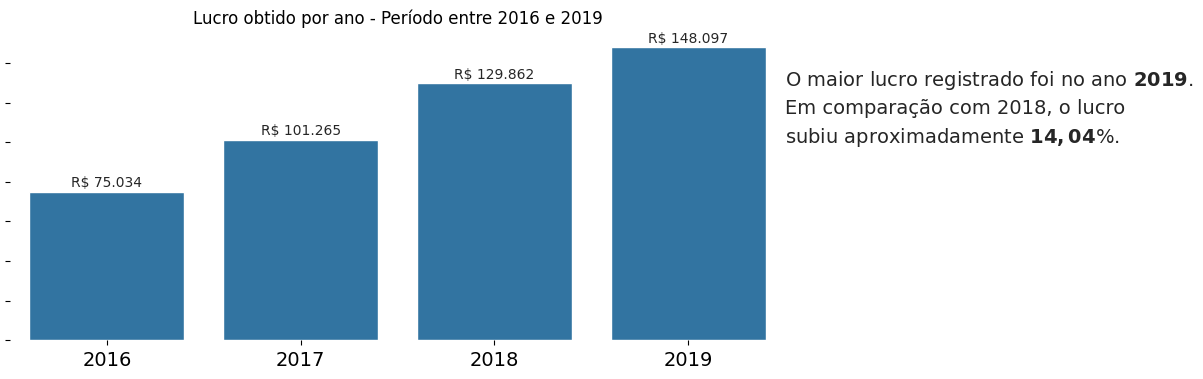

In [ ]:
# Gerando o gráfico

import matplotlib.pyplot as plt
import seaborn as sns

#Área do gráfico
fig, ax = plt.subplots(figsize=(10,4))
sns.set_theme(style = 'white')

ax = sns.barplot(data=df_lucro_ano, x=df_lucro_ano.index, y='lucro')

ax.set_title('Lucro obtido por ano - Período entre 2016 e 2019')
ax.set_xlabel('')
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize=14)
sns.despine(left=True, bottom = True)

ax.set_yticklabels([])

for i, valor in enumerate(df_lucro_ano['lucro']):
  qtd = f'R$ {valor:,.0f}'.replace(',' , '.')
  offset = 1e3
  ax.text(i, valor+ offset, qtd, ha='center', va='bottom', fontsize = 10)

ax.text(3.5, 1e5,
         'O maior lucro registrado foi no ano $\\bf{2019}$.\n'
         'Em comparação com 2018, o lucro\n'
         'subiu aproximadamente $\\bf{14,04}$%.',
         fontsize=14, linespacing=1.45)

plt.show()


##Desafio 2
###Qual foi o faturamento (vendas) dos top 10 produtos durante o período de 2016 a 2019 do nosso conjunto de dados? Adicione um pequeno texto falando dos 3 produtos que mais venderam.

In [ ]:
#verificando meus dados
vendas.head()

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28


In [ ]:
# Preciso dos dados de vendas e ano
top_10 = vendas.copy()
top_10 = top_10[['data_pedido','vendas', 'tipo_produto']]
top_10

,data_pedido,vendas,tipo_produto
0,2018-11-09,890.66,encanamentos
1,2018-11-09,2488.59,ferramentas
2,2018-06-13,49.72,sementes
3,2017-10-12,3255.75,materiais de revestimento
4,2017-10-12,76.04,vasos
...,...,...,...
8935,2018-09-30,123.22,ferramentas automotivas
8936,2019-11-18,271.97,ferramentas automotivas
8937,2019-11-18,700.75,pneus
8938,2016-01-22,85.83,iluminação


In [ ]:
# alterando o tipo de dado para data
top_10['data_pedido'] = pd.to_datetime(top_10['data_pedido'], format ='%Y-%m-%d')
top_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   data_pedido   8940 non-null   datetime64[ns]
 1   vendas        8940 non-null   float64       
 2   tipo_produto  8940 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 209.7+ KB


In [ ]:
#deixando somente o ano
top_10['ano'] = top_10.data_pedido.dt.year
top_10.drop(labels='data_pedido', axis = 1, inplace = True)
top_10

,vendas,tipo_produto,ano
0,890.66,encanamentos,2018
1,2488.59,ferramentas,2018
2,49.72,sementes,2018
3,3255.75,materiais de revestimento,2017
4,76.04,vasos,2017
...,...,...,...
8935,123.22,ferramentas automotivas,2018
8936,271.97,ferramentas automotivas,2019
8937,700.75,pneus,2019
8938,85.83,iluminação,2016


In [ ]:
# Agregando os dados e deixando-os em ordem de maior pro menod
top_10 = top_10.groupby(['tipo_produto']).aggregate('sum').sort_values('vendas', ascending= False)
top_10 = top_10[:10]
top_10

,vendas,ano
tipo_produto,,
pneus,1022428.97,1612163
ferramentas,995158.41,1099647
vasos,696044.18,1553651
ferramentas de jardinagem,648879.72,2742125
materiais de revestimento,629656.36,579072
equipamentos de limpeza,542304.58,215886
ferramentas automotivas,502109.29,1357954
peças de reposição,486907.94,127118
encanamentos,373223.88,417680


In [ ]:
# gerando o texto colorido
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')


<ipython-input-15-233423f87907>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_10, x='vendas', y=top_10.index, palette = cores)


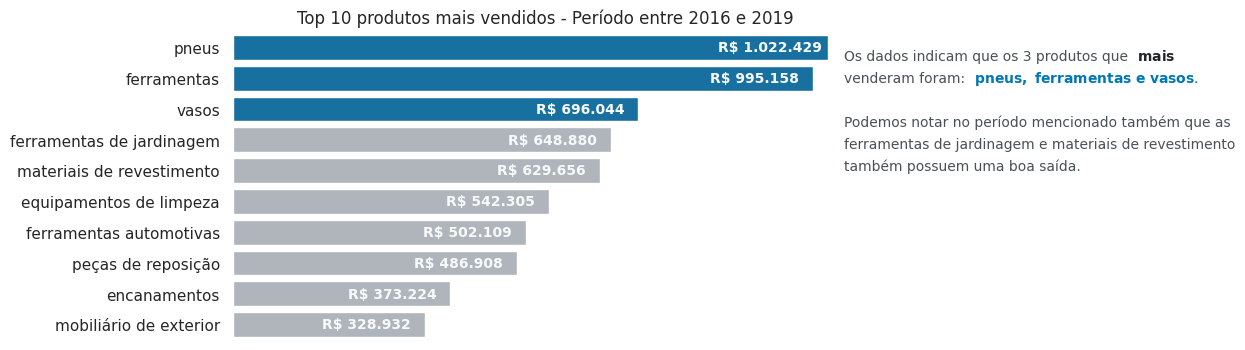

In [ ]:
#definindo as cores
AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'


# gerando o gráfico de barra

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,4))
fig.subplots_adjust(right = 0.75)
sns.set_theme(style = 'white')

cores = [AZUL2 if i< 3 else CINZA3 for i in range(10)]

ax = sns.barplot(data=top_10, x='vendas', y=top_10.index, palette = cores)

ax.set_title('Top 10 produtos mais vendidos - Período entre 2016 e 2019')
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.xaxis.set_tick_params(labelsize=14, labelcolor = CINZA1)
sns.despine(left=True, bottom = True)

# Escrevendo os valores de cada barra no gráfico
for i, valor in enumerate(top_10['vendas']):
  qtd = f'R$ {valor:,.0f}'.replace(',' , '.')
  offset = 1e5
  ax.text(valor - offset, i, qtd, color = CINZA5, fontweight = 'bold', ha='center', va='center', fontsize = 10)

#Gerando o texto colorido

texto_colorido(
    1.05e6,4,
    'Os dados indicam que os 3 produtos que || $\\bf{mais}$\n'     # texto
    'venderam foram: || $\\bf{pneus,\ ferramentas\ e\ vasos}$.\n'
    '\n'
    'Podemos notar no período mencionado também que as\n'
    'ferramentas de jardinagem e materiais de revestimento\n'
    'também possuem uma boa saída.',
    [[CINZA2, CINZA1],                # linha 1                     # cores
     [CINZA2, AZUL2],                 # linha 2
     [CINZA2],                        # linha 3
     [CINZA2],                        # linha 4
     [CINZA2],                        # linha 6
     [CINZA2]
    ],
    esp=22,         # espaçamento
    ax=ax,          # figura onde desenhar o texto
    fontsize=10)

# Exibindo o gráfico
plt.show()


# Desafio Aula 02

Neste desafio, a missão é construir as visualizações que respondam aos questionamentos abaixo:

**Desafio 1**: Como estão divididas as vendas das lojas de departamentos na Região Centro-Oeste nos anos de 2017 e 2018? O mesmo estado permaneceu como o que mais vendeu nesta região?

**Desafio 2**: Analisando cada departamento, como estão divididos os modos de envio em cada um deles percentualmente?


### Desafio 01

In [ ]:
vendas.head()

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28


In [ ]:
import pandas as pd

df_vendas_co = vendas.copy()
df_vendas_co = df_vendas_co[['regiao', 'estado', 'data_pedido', 'vendas']]
df_vendas_co

,regiao,estado,data_pedido,vendas
0,Sudeste,São Paulo,2018-11-09,890.66
1,Sudeste,São Paulo,2018-11-09,2488.59
2,Sudeste,Rio de Janeiro,2018-06-13,49.72
3,Sul,Paraná,2017-10-12,3255.75
4,Sul,Paraná,2017-10-12,76.04
...,...,...,...,...
8935,Sudeste,Rio de Janeiro,2018-09-30,123.22
8936,Nordeste,Bahia,2019-11-18,271.97
8937,Nordeste,Bahia,2019-11-18,700.75
8938,Nordeste,Paraíba,2016-01-22,85.83


In [ ]:
#ajustando data

df_vendas_co['data_pedido'] = pd.to_datetime(df_vendas_co['data_pedido'], format ='%Y-%m-%d')
df_vendas_co.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   regiao       8940 non-null   object        
 1   estado       8940 non-null   object        
 2   data_pedido  8940 non-null   datetime64[ns]
 3   vendas       8940 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 279.5+ KB


In [ ]:
# Extraindo o ano da data_pedido

df_vendas_co['ano'] = df_vendas_co.data_pedido.dt.year

df_vendas_co

,regiao,estado,data_pedido,vendas,ano
0,Sudeste,São Paulo,2018-11-09,890.66,2018
1,Sudeste,São Paulo,2018-11-09,2488.59,2018
2,Sudeste,Rio de Janeiro,2018-06-13,49.72,2018
3,Sul,Paraná,2017-10-12,3255.75,2017
4,Sul,Paraná,2017-10-12,76.04,2017
...,...,...,...,...,...
8935,Sudeste,Rio de Janeiro,2018-09-30,123.22,2018
8936,Nordeste,Bahia,2019-11-18,271.97,2019
8937,Nordeste,Bahia,2019-11-18,700.75,2019
8938,Nordeste,Paraíba,2016-01-22,85.83,2016


In [ ]:
# Selecionandod os dados do centro-oeste e os anos de 2017 e 2018
df_vendas_co = df_vendas_co.query("regiao == 'Centro-Oeste' and (ano == 2017 or ano == 2018)")
#removendo colunas data_pedido e regiao
df_vendas_co.drop(labels =["data_pedido","regiao"], axis =1, inplace = True)
df_vendas_co


<ipython-input-20-45c5f58a4a66>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vendas_co.drop(labels =["data_pedido","regiao"], axis =1, inplace = True)


,estado,vendas,ano
26,Distrito Federal,10483.69,2017
27,Distrito Federal,32.70,2017
28,Distrito Federal,422.28,2017
29,Distrito Federal,11.10,2017
30,Distrito Federal,293.40,2017
...,...,...,...
8737,Distrito Federal,421.35,2018
8833,Mato Grosso,289.20,2017
8884,Distrito Federal,114.00,2018
8885,Distrito Federal,124.92,2018


In [ ]:
# Precisamos fazer a tabela cruzada
df_vendas_co = pd.crosstab(index = df_vendas_co.ano, columns = df_vendas_co.estado, values = df_vendas_co.vendas, aggfunc = 'sum')
df_vendas_co

estado,Distrito Federal,Goiás,Mato Grosso,Mato Grosso do Sul
ano,,,,
2017,64308.70,66078.33,5259.46,13568.51
2018,103036.69,79801.93,10980.07,14250.02


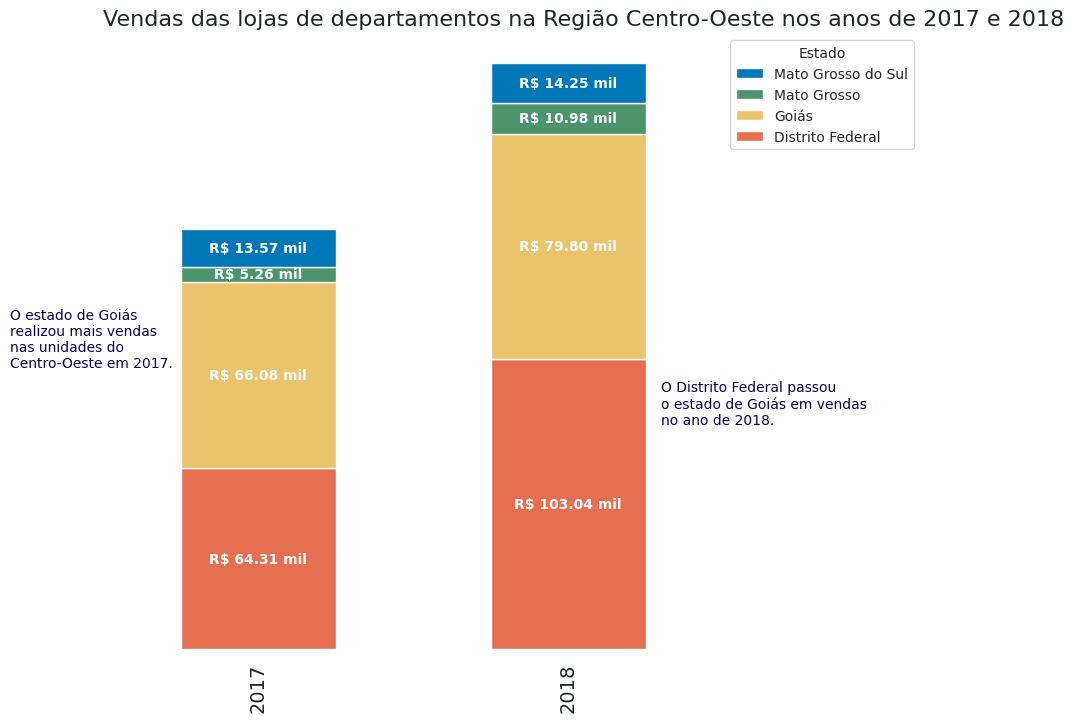

In [ ]:
# Gerando cores do gráfico

cores = [VERMELHO1, AMARELO1, VERDE1, AZUL2]

#gerando o grafico de colunas empilhadas
ax = df_vendas_co.plot(kind='bar', stacked = True, figsize = (8,8), color = cores)

#Personalizando o grafico
ax.set_title('Vendas das lojas de departamentos na Região Centro-Oeste nos anos de 2017 e 2018', loc = 'left', fontsize = 16, color = CINZA1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.xaxis.set_tick_params(labelsize=14, labelcolor = CINZA1)
ax.set_frame_on(False)

#removendo os ticks do eixo x e y --> Tá dando pau! por isso removi
# ax.tick_params(axis="both", which ="both", lenght =0)

#anotando uma conclusao no grafico
ax.text(-0.8, 1e5, 'O estado de Goiás\nrealizou mais vendas\nnas unidades do\nCentro-Oeste em 2017.',
        fontsize=10, linespacing=1.2, color=AZUL1)
ax.text(1.3, 8e4, 'O Distrito Federal passou\no estado de Goiás em vendas\nno ano de 2018.',
        fontsize=10, linespacing=1.2, color=AZUL1)

#personalizando a legeneda
ax.legend(bbox_to_anchor=(1,1), reverse = True, title="Estado", title_fontsize = 10, fontsize = 10)

# Adicionando os valroes
for container in ax.containers:
  labels = [f'R$ {valor.get_height()/1000:,.2f} mil'.replace(",",".") for valor in container]
  ax.bar_label(container, label_type="center", labels = labels, size = 10, color = CINZA5, fontweight = "bold")

fig = ax.get_figure()
plt.show()

##Desafio 02
###Analisando cada departamento, como estão divididos os modos de envio em cada um deles percentualmente?

In [ ]:
# upando os dados

df_depart = vendas.copy()
df_depart = df_depart[['departamento', 'modo_envio']]

# criando o crosstab

df_depart = pd.crosstab(index=df_depart.departamento, columns= df_depart.modo_envio, normalize = 'index')
df_depart

modo_envio,24 horas,Econômica,Entrega padrão,Envio rápido
departamento,,,,
Automotivo,0.051766,0.195493,0.593179,0.159562
Jardinagem e paisagismo,0.055504,0.190854,0.605569,0.148073
Materiais de construção,0.058133,0.202133,0.588267,0.151467


In [ ]:
#Criando um texto colorido

from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')


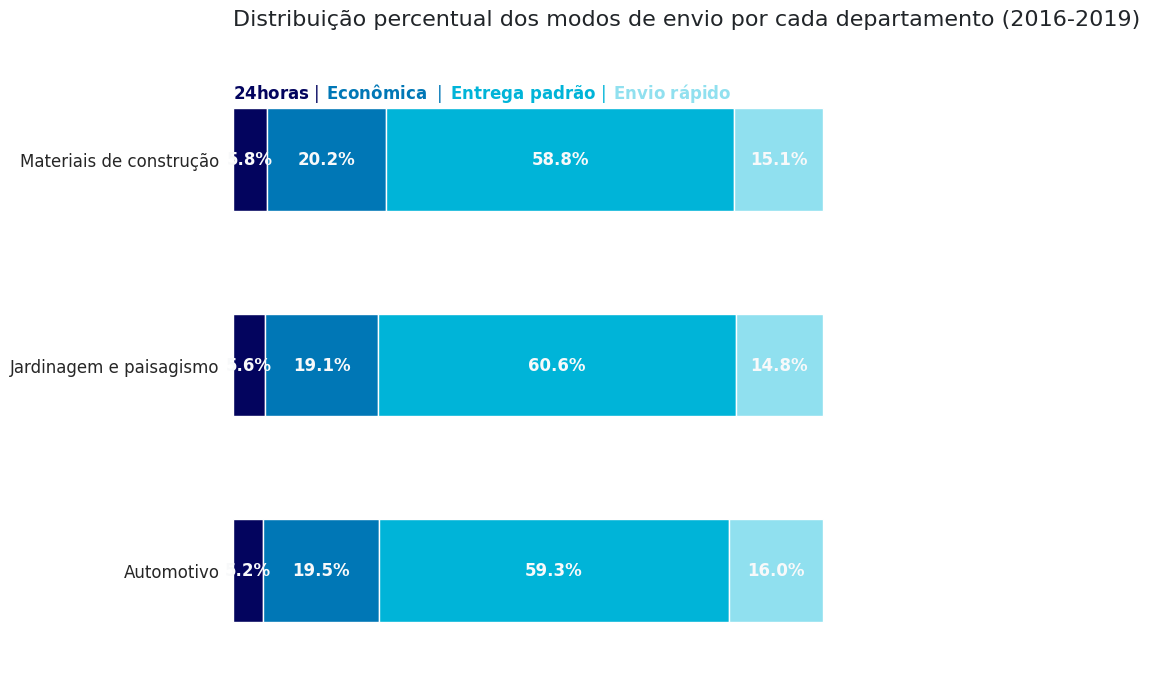

In [ ]:
#Definindo cores gráfico
cores = [AZUL1, AZUL2, AZUL3, AZUL4]

#gerando grafico de barras empilhadas
ax = df_depart.plot(kind='barh', stacked = True, figsize = (8,8), color = cores, legend = None)
ax.set_title("Distribuição percentual dos modos de envio por cada departamento (2016-2019)\n",
             fontsize=16, loc="left", color=CINZA1)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticklabels([])
ax.yaxis.set_tick_params(labelsize=12, color=CINZA2)
ax.set_frame_on(False)

#Removendo os ticks do eixo x e y
#ax.tick_params(axis="both", which ="both", lenght =0)

#legenda dos dados
texto_colorido(0, 2.3, '$\\bf{24 horas}$ | || $\\bf{Econômica}$  | || $\\bf{Entrega\ padrão}$ | || $\\bf{Envio\ rápido}$', cores = [cores], ax=ax, fontsize=12)

#Valores nas barras
for container in ax.containers:
    labels = [f'{valor.get_width()*100:.1f}%' for valor in container]
    ax.bar_label(container, label_type='center', labels = labels, size = 12, color = CINZA5, fontweight='bold')

fig = ax.get_figure()
plt.show()


# Desafio Aula 03

Neste desafio, a missão é construir as visualizações que respondam aos questionamentos que compartilharemos aqui abaixo:

Desafio 1: Como estão as vendas por semestre no estado em que você mora ou que deseja conhecer? Destaque os valores máximos e mínimos de venda para apresentá-los ao seu público.

Dica: Para agrupar os dados por semestre você pode utilizar a função resample da seguinte forma: resample(“2Q”, closed = “left”)

Desafio 2: Compare os lucros anuais dos estados da região Nordeste por meio de um gráfico de linhas.

Sugestão: No Desafio 2, utilize o Plotly para possibilitar ao usuário a escolha entre linhas que deseja visualizar.

## Desafio 01

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Criando um DF com a transformação da data
df_estado = vendas.copy()
df_estado['data_pedido'] = pd.to_datetime(df_estado['data_pedido'], format ='%Y-%m-%d')

In [ ]:
# Selecionando os dados do estado que quero
df_estado = df_estado.query('estado == "Santa Catarina"')[["data_pedido", "vendas"]]

# Agrupando as vendas por final do semestre (2Q)
df_estado.set_index("data_pedido", inplace = True)
df_estado = df_estado.resample("2Q", closed="left").agg("sum")
df_estado = df_estado.reset_index()
df_estado.head()


,data_pedido,vendas
0,2016-09-30,7853.79
1,2017-03-31,8345.43
2,2017-09-30,16257.45
3,2018-03-31,15493.02
4,2018-09-30,24212.36


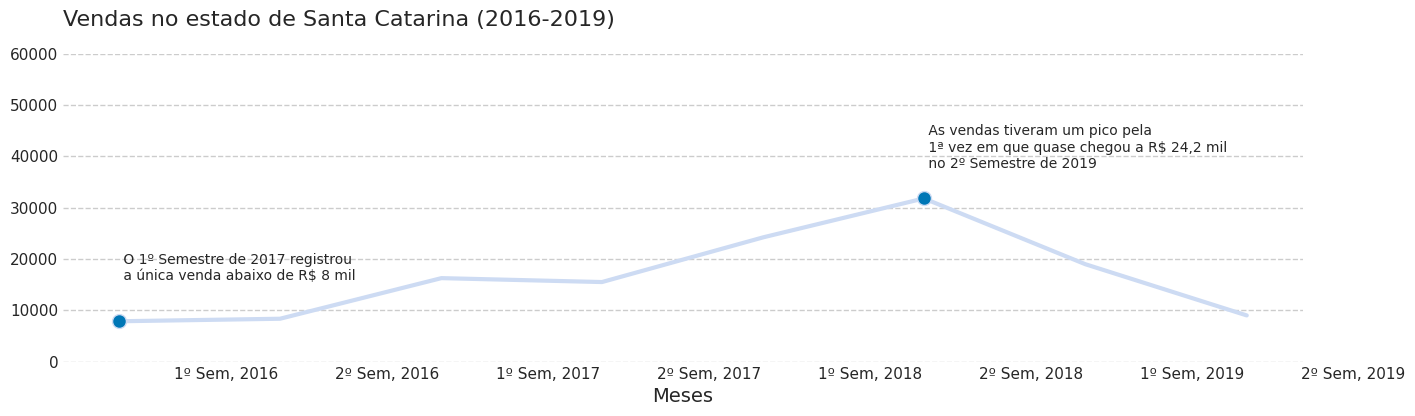

In [ ]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(16,4))

# Resgatando o valor minimo, maximo das vendas
venda_min = df_estado.vendas.min()
venda_max = df_estado.vendas.max()
valores = df_estado.vendas.values

# Gerando a lista com os pontos a marcar (True apenas para mínimo e máximo)
pontos_a_marcar = list((valores == venda_min) | (valores == venda_max))

# Criando o gráfico de linha das vendas
ax.plot(df_estado["data_pedido"], df_estado["vendas"], lw = 3, color = AZUL5, marker = "o",
          markersize = 10, markerfacecolor = AZUL2, markevery =  pontos_a_marcar)

## Personalizando o gráfico
ax.set_title('Vendas no estado de Santa Catarina (2016-2019)', fontsize = 16, loc='left', pad = 20)
ax.set_xlabel('Meses', fontsize = 14)
ax.set_ylabel('')
ax.grid(axis = "y", linestyle="--")
ax.set_frame_on(False)

# remover todos os ticks do eixo x e y
ax.tick_params(axis='both', which='both', length=0)

# Descrevendo o limite mínimo e máximo do eixo y
plt.ylim(0, 0.6e5)

# Definindo o intervalo semestral para os dados
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth = [6,12]))
labels = ["1º Sem, 2016", "2º Sem, 2016", "1º Sem, 2017", "2º Sem, 2017",
          "1º Sem, 2018", "2º Sem, 2018", "1º Sem, 2019", "2º Sem, 2019"]
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(labels, ha = "left")

# Escrevendo texto nos pontos de destaque
for x, y in zip(df_estado.data_pedido, df_estado.vendas):
  if y == venda_min:
    ax.text(x, y = y + 0.8e4, s = f" O 1º Semestre de 2017 registrou \n a única venda abaixo de R$ 8 mil", fontsize = 10)
  if y == venda_max:
    ax.text(x, y = y + 0.6e4, s = f" As vendas tiveram um pico pela \n 1ª vez em que quase chegou a R$ 24,2 mil \n no 2º Semestre de 2019", fontsize = 10)

plt.show()

## Desafio 02
Compare os lucros anuais dos estados da região Nordeste por meio de um gráfico de linhas.
Sugestão: No Desafio 2, utilize o Plotly para possibilitar ao usuário a escolha entre linhas que deseja visualizar.


In [ ]:
# Importando as bibliotecas
import pandas as pd
import plotly.express as px

# Importando o relatório de vendas e atualizando a colunas de pedido para o tipo data
df_reg = vendas.copy()
vendas["data_pedido"] = pd.to_datetime(vendas["data_pedido"], format="%Y-%m-%d")

# Criando um df com os dados desejados
df_ne = vendas.copy()
df_ne = df_ne.query("regiao == 'Nordeste'")[["estado","data_pedido", "lucro"]]


In [ ]:
# Criando uma tabela cruzada (crosstab) com os valores de lucro por dia por estado
df_estados_ne = pd.crosstab(index = df_ne.data_pedido, columns = df_ne.estado, values = df_ne.lucro, aggfunc="sum")

# Agrupando os lucros por ano
df_estados_ne = df_estados_ne.resample('Y').agg('sum')
df_estados_ne = round(df_estados_ne/1e3, 2)
df_estados_ne


estado,Alagoas,Bahia,Ceará,Maranhão,Paraíba,Pernambuco,Piauí,Rio Grande do Norte,Sergipe
data_pedido,,,,,,,,,
2016-12-31,1.20,9.98,10.25,1.88,-0.27,11.73,0.02,0.27,0.89
2017-12-31,3.77,6.89,9.88,1.60,-2.20,4.24,1.43,0.65,0.98
2018-12-31,3.13,8.59,6.40,2.69,0.15,9.18,5.43,1.44,0.55
2019-12-31,1.45,14.09,30.26,5.07,1.60,6.98,1.34,2.09,1.95


In [ ]:
# Importando a biblioteca
import plotly.express as px

# Gerando um gráfico de linha com os lurcos das lojas por ano dividido por estado da região nordeste
fig = px.line(df_estados_ne, x=df_estados_ne.index, y=df_estados_ne.columns, markers = True, labels={"estado": "Estados"},
              color_discrete_sequence=[AZUL2, VERMELHO1, AMARELO1 , VERDE1, CINZA3, AZUL5, LARANJA1, CINZA1, AZUL4])

# Ajustando o layout do gráfico
fig.update_layout(width=1300, height=600, font_family = 'DejaVu Sans', font_size=15,
                  font_color= CINZA2, title_font_color= CINZA1, title_font_size=24,
                  title_text='Lucros das lojas de departamentos por ano na Região Nordeste' +
                             '<br><sup size=1 style="color:#555655">De 2016 a 2019</sup>',
                  xaxis_title='', yaxis_title='', plot_bgcolor= CINZA5)

# Ajustando os ticks do eixo y para o formato em milhar
fig.update_yaxes(tickprefix="R$ ", ticksuffix=" mil")

# Ajustando o eixo x com os labels dos anos
labels = ['2016', '2017', '2018', '2019']
fig.update_xaxes(ticktext = labels, tickvals=df_estados_ne.index)

# Dados ao passar o mouse (hover)
fig.update_traces(mode="markers+lines", hovertemplate = "<b>Período:</b> %{x} <br> <b>Lucro:</b> %{y}")

fig.show()

# Desafio Aula 04

Vamos praticar a criação de gráficos de distribuição de dados. Para esse desafio, vamos trabalhar com duas base de dados diferentes: a primeira será um dataset com as idades de uma amostra da população do município de Cidade Alegre, cidade fictícia que utilizamos em uma de nossas atividades, e a segunda será o dataset dos volumes do amaciante que utilizamos durante essa aula, que está disponível no github do projeto.

Neste desafio, a missão é construir as visualizações que respondam aos questionamentos que compartilharemos aqui abaixo:

Desafio 1: Baixe a base de dados com as amostras das idades dos moradores do município de Cidade Alegre e crie os histogramas de colunas e de linha lado a lado, buscando interpretar as diferenças entre eles e o que podem representar separadamente. Adicione também uma linha que define a mediana da distribuição no histograma de linha e escreva o valor dessa medida no gráfico.

Dica 1: Para desenhar os gráficos separados, utilize a mesma ideia que executamos no gráfico de barras empilhadas: fig, axs = plt.subplots(n_linhas, n_colunas, figsize=(largura, altura)).

Dica 2: E, para desenhar 2 ou mais gráficos no seaborn, precisamos passar um parâmetro ax para a função de desenho do visual, por exemplo, sns.barplot(ax = axs[0], …)
Desafio 2: Represente no boxplot dos volumes do amaciante os limites superiores e inferiores do diagrama de caixa. Comente sobre o resultado encontrado ao desenhar esses limites no boxplot.

Dica: Para conseguir definir os limites superiores e inferiores, calcule o intervalo interquartil dos dados e, logo em seguida, cada um dos limites, seguindo as fórmulas do Faça como eu fiz: elementos de um boxplot.
Caso precise de ajuda, uma opção de solução da atividade estará disponível na seção “Opinião da pessoa instrutora”.

##Desafio 01


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#importando os dados
idade = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Curso 02 - Avançado em Python/1.2 Data Visualization: Gráficos de comparação e distribuição/Dados utilizados/pop_idade.csv')
idade.head()

,idade
0,39
1,33
2,41
3,50
4,32


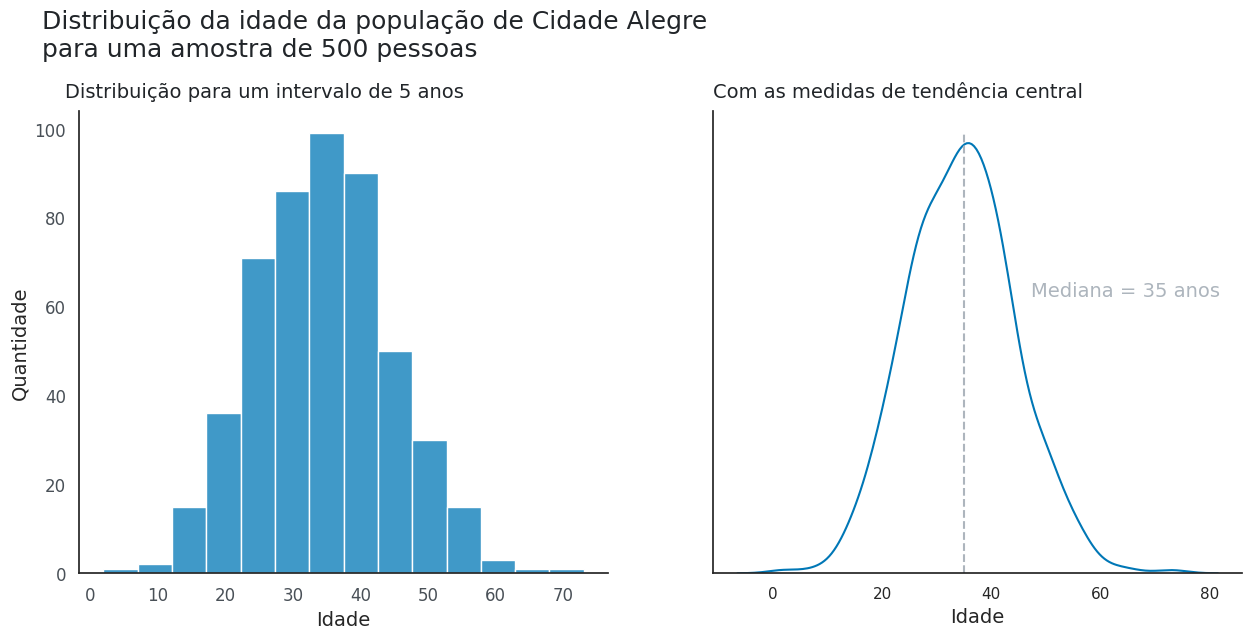

In [ ]:
# Área do gráfico e tema da visualização
fig, axs = plt.subplots(1, 2, figsize=(15,6))
sns.set_theme(style="white")

# Título dos gráficos
fig.suptitle("Distribuição da idade da população de Cidade Alegre \npara uma amostra de 500 pessoas",
             fontsize=18, color=CINZA1, x = 0.1, y = 1.05, ha="left")

# GRÁFICO 1 - Histograma de Colunas

sns.histplot(ax = axs[0], data = idade, x = "idade", binwidth = 5, color = AZUL2)
axs[0].set_title('Distribuição para um intervalo de 5 anos', size=14, color=CINZA1, x = 0.35,  pad = 10)
axs[0].set_xlabel('Idade', fontsize = 14)
axs[0].set_ylabel('Quantidade', fontsize = 14)
axs[0].yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
axs[0].xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine()

# GRÁFICO 2 - Histograma de Linhas

sns.kdeplot(ax = axs[1], data = idade, x = "idade", color = AZUL2)
axs[1].set_title('Com as medidas de tendência central', size=14, color=CINZA1, x = 0.35,  pad = 10)
axs[1].set_xlabel('Idade', fontsize = 14)
axs[1].set_ylabel('')
axs[1].yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
axs[1].set_yticklabels([])
sns.despine()

# gerando a linha que define a mediana e anotando seu valor
axs[1].vlines(x = idade.idade.median(), ymin = 0, ymax = 0.04, colors = CINZA3, linestyles = "--")
axs[1].text(0.6, 0.6, f'Mediana = {int(idade.idade.median())} anos', fontsize=14, color = CINZA3, transform=axs[1].transAxes)

plt.show()


## Desafio 02
Represente no boxplot dos volumes do amaciante os limites superiores e inferiores do diagrama de caixa. Comente sobre o resultado encontrado ao desenhar esses limites no boxplot.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns

vol_amaciante = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Curso 02 - Avançado em Python/1.2 Data Visualization: Gráficos de comparação e distribuição/Dados utilizados/volume_amaciante.csv')
vol_amaciante.head()

,Volume
0,999.8
1,999.5
2,999.7
3,999.1
4,999.8


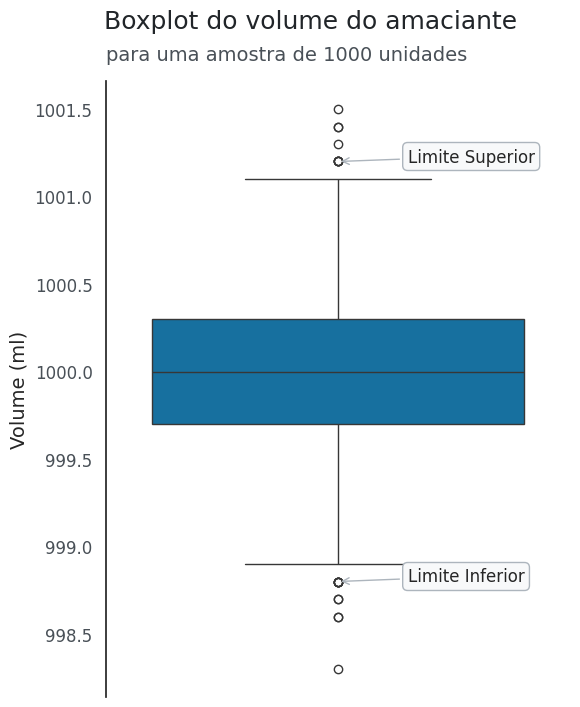

In [ ]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(6,8))
sns.set_theme(style="white")

# Gerando o boxplot
ax = sns.boxplot(data = vol_amaciante, y = "Volume", orient = "v", color = AZUL2)

## Personalizando o gráfico
plt.suptitle('Boxplot do volume do amaciante', size=18, color=CINZA1, ha = 'right', x = 0.81, y = 0.97)
plt.title('para uma amostra de 1000 unidades', fontsize=14, color=CINZA2, pad = 15, loc = "left")
ax.set_xlabel('')
ax.set_ylabel('Volume (ml)', fontsize = 14)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine(bottom=True)

# Calculando o intervalo interquartil(IIQ) e os limites máximos e mínimos
IIQ = vol_amaciante["Volume"].quantile(0.75) - vol_amaciante["Volume"].quantile(0.25)
limite_superior = vol_amaciante["Volume"].quantile(0.75) + 1.5 * IIQ
limite_inferior = vol_amaciante["Volume"].quantile(0.25) - 1.5 * IIQ

# Adicionando a anotação dos limites superiores e inferiores de um boxplot
ax.annotate("Limite Superior", xy=(0, limite_superior), xycoords='data',  # coordenadas do ponto desejado
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),                          # caixa de texto
            xytext=(50, 0), textcoords='offset points',                                 # posição do texto
            arrowprops=dict(arrowstyle="->", color=CINZA3))                             # propriedades da seta

ax.annotate("Limite Inferior", xy=(0, limite_inferior), xycoords='data',
            bbox=dict(boxstyle="round", fc=CINZA5, ec=CINZA3),
            xytext=(50, 0), textcoords='offset points',
            arrowprops=dict(arrowstyle="->", color=CINZA3))

plt.show()

# Desafio Aula 05
Vamos praticar a criação de gráficos de distribuição de dados para duas variáveis, numéricas e/ou categóricas. Para a prática, vamos trabalhar com duas base de dados diferentes: a primeira será um dataset com as notas de 3 turmas do curso de Data Visualization da plataforma de cursos de tecnologia fictícia que utilizamos em uma de nossas atividades, e a segunda será o dataset das medidas da caixa de sabão em pó da fábrica de produtos de higiene e limpeza que utilizamos durante essa aula, que está disponível no github do projeto.
Neste desafio, a missão é construir as visualizações que respondam aos questionamentos que compartilharemos aqui abaixo:

Desafio 1: Baixe a base de dados com as notas das turmas de Data Visualization e crie o violinplot, buscando interpretar as diferenças entre cada uma delas e documentando os seus achados. Sinta-se livre para adicionar alguns dos recursos que aprendemos ao longo do curso, como anotações, textos e figuras.

Desafio 2: Crie o gráfico de dispersão que distribua as medidas de comprimento e largura da amostra B. Desenhe no gráfico as linhas de rejeição para os itens em que o valor de comprimento e largura seja acima de 2% ou abaixo do valor de 20 cm e 5 cm, respectivamente.

## Desafio 01
Baixe a base de dados com as notas das turmas de Data Visualization e crie o violinplot, buscando interpretar as diferenças entre cada uma delas e documentando os seus achados. Sinta-se livre para adicionar alguns dos recursos que aprendemos ao longo do curso, como anotações, textos e figuras

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

notas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Curso 02 - Avançado em Python/1.2 Data Visualization: Gráficos de comparação e distribuição/Dados utilizados/notas.csv')
notas.head()

,Turma,Nota
0,Turma 1,79
1,Turma 1,73
2,Turma 1,80
3,Turma 1,88
4,Turma 1,72


<ipython-input-103-537c65348d0f>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




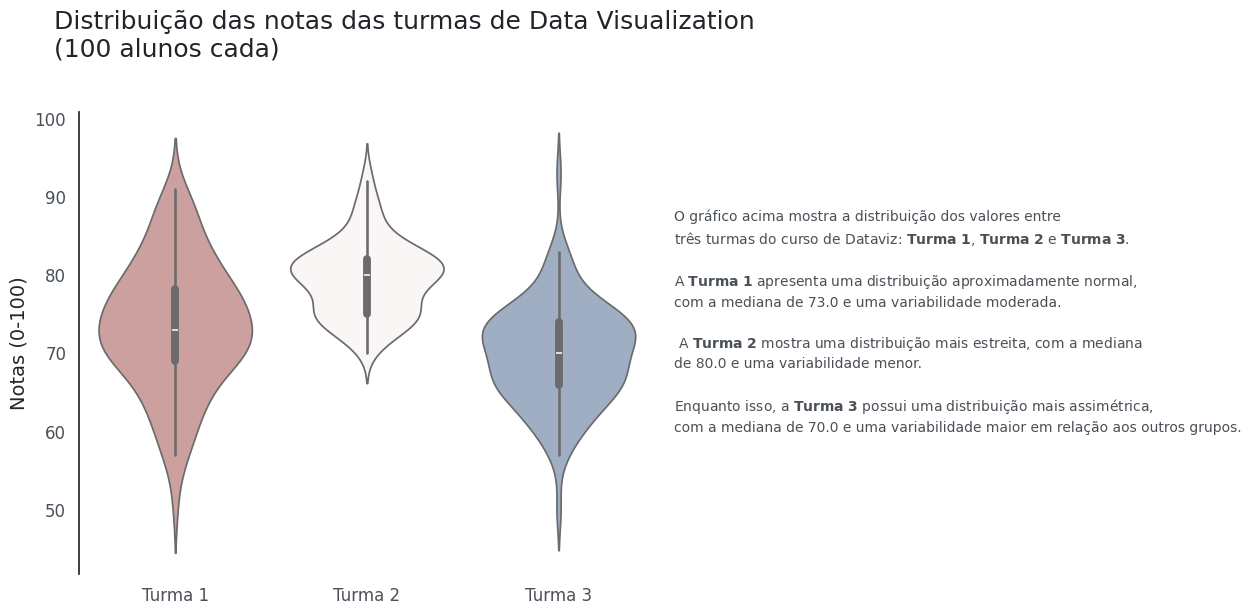

In [ ]:
#Area do grafico e tema de visualização
fig, ax = plt.subplots(figsize=(10,6))
fig.subplots_adjust(right = 0.7)
sns.set_theme(style="white")

#Gerando o violinplot das notas
ax = sns.violinplot(data = notas, x = 'Turma', y='Nota', palette = 'vlag_r')

# Personalizando o grafico
plt.suptitle('Distribuição das notas das turmas de Data Visualization\n(100 alunos cada)', size=18, color=CINZA1, ha = 'left', x = 0.1, y = 1.05)
ax.set_xlabel('')
ax.set_ylabel('Notas (0-100)', fontsize = 14)
ax.xaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
ax.yaxis.set_tick_params(labelsize=12, labelcolor = CINZA2)
sns.despine(bottom=True)

# Criando uma lista com as medianas de cada turma
mediana = []
for i in range(1,4):
  mediana.append(notas.query(f"Turma == 'Turma {i}'").Nota.median())

# Texto explicativo
ax.text(2.6, 60,
         'O gráfico acima mostra a distribuição dos valores entre\n'
         'três turmas do curso de Dataviz: $\\bf{Turma\ 1}$, $\\bf{Turma\ 2}$ e $\\bf{Turma\ 3}$.\n\n'
         'A $\\bf{Turma\ 1}$ apresenta uma distribuição aproximadamente normal,\n'
         f'com a mediana de {mediana[0]} e uma variabilidade moderada.\n\n'
         ' A $\\bf{Turma\ 2}$ mostra uma distribuição mais estreita, com a mediana\n'
         f'de {mediana[1]} e uma variabilidade menor.\n\n'
         'Enquanto isso, a $\\bf{Turma\ 3}$ possui uma distribuição mais assimétrica,\n'
         f'com a mediana de {mediana[2]} e uma variabilidade maior em relação aos outros grupos.',
         fontsize=10, linespacing=1.45, color=CINZA2)

plt.show()

## Desafio 02
Crie o gráfico de dispersão que distribua as medidas de comprimento e largura da amostra B. Desenhe no gráfico as linhas de rejeição para os itens em que o valor de comprimento e largura seja acima de 2% ou abaixo do valor de 20 cm e 5 cm, respectivamente.
notas

In [ ]:
# Importando a base de dados dos volumes de um amaciante em 1000 amostras realizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_medidas = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Curso 02 - Avançado em Python/1.2 Data Visualization: Gráficos de comparação e distribuição/Dados utilizados/medidas_sabao_em_po.csv')
df_b = df_medidas.query('amostra == "B"')[["comprimento", "largura"]]

df_b.head()

,comprimento,largura
200,19.97,5.10
201,20.13,4.94
202,20.12,4.95
203,20.04,4.96
204,19.97,4.98


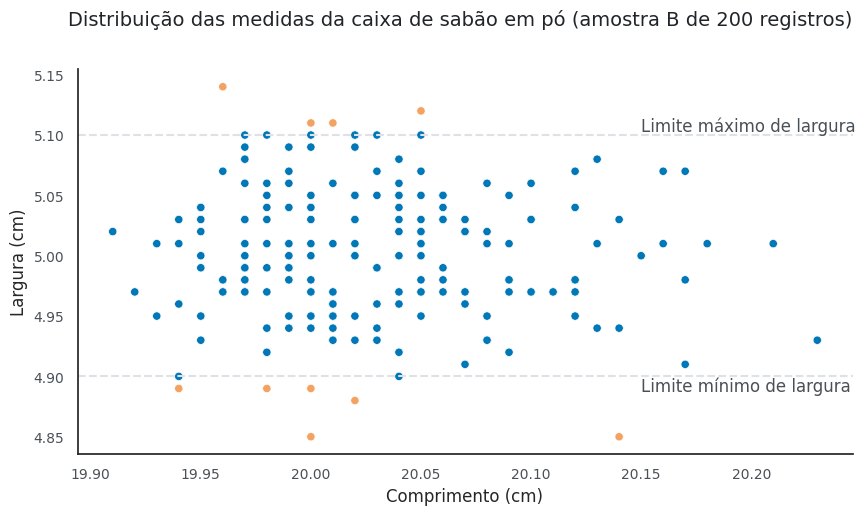

In [ ]:
# Área do gráfico e tema da visualização
fig, ax = plt.subplots(figsize=(10,5))
sns.set_theme(style="white")

# Definindo as cores do gráfico e a porcentagem de rejeição
cores = [VERMELHO1, LARANJA1, AZUL2]
pct = 0.02

# Mapeando as cores para a faixa requisitada (2%)
rejeita_comp = [True if (c > 20*(1+pct) or c < 20*(1-pct)) else False for c in df_b["comprimento"]]
rejeita_larg = [True if (a > 5*(1+pct) or a < 5*(1-pct)) else False for a in df_b["largura"]]
map_cores = np.where(rejeita_comp, cores[0], np.where(rejeita_larg, cores[1], cores[2]))

# Gerando o gráfico de dispersão
ax = sns.scatterplot(data = df_b, x="comprimento", y = "largura", color = map_cores)

# Personalizando o gráfico
plt.suptitle('Distribuição das medidas da caixa de sabão em pó (amostra B de 200 registros)', size=14, color=CINZA1, ha = 'right', x = 0.9, y = 1)
ax.set_xlabel('Comprimento (cm)', fontsize = 12)
ax.set_ylabel('Largura (cm)', fontsize = 12)
ax.yaxis.set_tick_params(labelsize=10, labelcolor = CINZA2)
ax.xaxis.set_tick_params(labelsize=10, labelcolor = CINZA2)
sns.despine()

### Desenhando as linhas verticais com os limites mínimos e máximo de altura desejada
ax.text(20.15, 5.1, 'Limite máximo de largura', fontsize=12, color = CINZA2, ha="left", va = "bottom")
plt.axhline(y = 5 * (1 + pct), color = CINZA4, linestyle='--')
ax.text(20.15, 4.9, 'Limite mínimo de largura', fontsize=12, color = CINZA2, ha="left", va = "top")
plt.axhline(y = 5 * (1 - pct), color = CINZA4, linestyle='--')

plt.show()
